In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df1 = pd.read_csv('anounce_jobs_INFORMATIQUE.csv')
df2 = pd.read_csv('anounce_jobs_IT.csv')
df3 = pd.read_csv('rekrute_IT.csv')

# Fusionner les DataFrames en un seul
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Enregistrer le DataFrame fusionné dans un nouveau fichier CSV
merged_df.to_csv('anounceData.csv', index=False)

# Data wrangling 

In [5]:
data= pd.read_csv("anounceData.csv")

In [7]:
pd.options.display.max_columns = None

# Set the maximum number of rows to display
pd.options.display.max_rows = None

In [8]:
data.head()

,job Title,adresse company,time,Domaine,Fonction,Contrat,Entreprise,salaire,Niveau_etude
0,Agent de Technique Informatique,Casablanca,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Systèmes d'Information,Contrat : CDI,Entreprise : Confidentiel,Salaire : A discuter,Niveau d'études : Bac plus 2
1,Ingénieur développeur Symfony / PHP 7,Marrakech,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Développement,Contrat : CDI,Entreprise : Alter IPSO,Salaire : 8 000 - 10 000 DH,Niveau d'études : Bac plus 5
2,INFOGRAPHIE DESING,Casablanca,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Webdesign/Infographie,Contrat : A discuter,Entreprise : CONFIDENTIEL,Salaire : A discuter,Niveau d'études : Bac plus 2
3,Intégration erp odoo,Casablanca,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Systèmes d'Information,Contrat : CDI,Entreprise : Bociel,Salaire : A discuter,Niveau d'études : Pas important
4,Commercial Expérimenté pour Startup Innovante IT,Casablanca,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Systèmes d'Information,Contrat : CDI,Entreprise : Bociel,Salaire : A discuter,Niveau d'études : Pas important


In [9]:
data.tail()

,job Title,adresse company,time,Domaine,Fonction,Contrat,Entreprise,salaire,Niveau_etude
575,Développeur Front-end React (H/F),Casablanca (Maroc),16/01/2024,Informatique,Informatique / Electronique,CDI,NaN,NaN,Bac +5 et plus
576,Expert Technico Fonctionnel Billing (H/F) -Déb...,Technopolis (Maroc),16/01/2024,Informatique,Informatique / Electronique,CDI,NaN,NaN,Bac +5 et plus
577,Ingénieur DevOps (H/F) - Technopolis,Rabat (Maroc),16/01/2024,Informatique,Informatique / Electronique,CDI,NaN,NaN,Bac +5 et plus
578,Développeur Node.js (Back-end),Casablanca (Maroc),16/01/2024,Informatique,Informatique / Electronique,CDI,NaN,NaN,Bac +5 et plus
579,Ingénieur(e) Support (H/F),Rabat (Maroc),16/01/2024,Informatique,Informatique / Electronique,CDI,NaN,NaN,Bac +2


In [10]:
data.shape

(580, 9)

In [11]:
data.columns

Index(['job Title', 'adresse company', 'time', 'Domaine', 'Fonction',
       'Contrat', 'Entreprise', 'salaire', 'Niveau_etude'],
      dtype='object')

check dataset and messing value 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job Title        580 non-null    object
 1   adresse company  580 non-null    object
 2   time             580 non-null    object
 3   Domaine          483 non-null    object
 4   Fonction         483 non-null    object
 5   Contrat          483 non-null    object
 6   Entreprise       283 non-null    object
 7   salaire          283 non-null    object
 8   Niveau_etude     483 non-null    object
dtypes: object(9)
memory usage: 40.9+ KB


In [13]:
data.isna().sum()

job Title            0
adresse company      0
time                 0
Domaine             97
Fonction            97
Contrat             97
Entreprise         297
salaire            297
Niveau_etude        97
dtype: int64

In [14]:
# le pourcentage des valeurs manaquant pour chaque column 
toux_na_col={}
for col in data.columns:
    toux_na_col[col] = data[col].isna().sum() / data.shape[0]

# Afficher les pourcentages de valeurs manquantes pour chaque colonne
for col, pourcentage in toux_na_col.items():
    print(f"Pourcentage de valeurs manquantes pour la colonne '{col}': {pourcentage:.2%}")

Pourcentage de valeurs manquantes pour la colonne 'job Title': 0.00%
Pourcentage de valeurs manquantes pour la colonne 'adresse company': 0.00%
Pourcentage de valeurs manquantes pour la colonne 'time': 0.00%
Pourcentage de valeurs manquantes pour la colonne 'Domaine': 16.72%
Pourcentage de valeurs manquantes pour la colonne 'Fonction': 16.72%
Pourcentage de valeurs manquantes pour la colonne 'Contrat': 16.72%
Pourcentage de valeurs manquantes pour la colonne 'Entreprise': 51.21%
Pourcentage de valeurs manquantes pour la colonne 'salaire': 51.21%
Pourcentage de valeurs manquantes pour la colonne 'Niveau_etude': 16.72%


In [115]:
data.duplicated().sum()   

5

<font color="red">we need to manage the missing valeus and duplicated rows in our dataset. <font>

<h4> Analyse Univarie </h4>
before manage the massing values

notre dataset containe que les donnes qualicatife pour chaque column on va avoir les points suivants : 
1. les modalites de chaque column : unique() 
2. nomber de frequence pour chaque modalite :  value_counts()
3. La modalite la plus frequent pour chaque coulmn : mode() 
4. visualisation de chaque column .

In [16]:
data.columns

Index(['job Title', 'adresse company', 'time', 'Domaine', 'Fonction',
       'Contrat', 'Entreprise', 'salaire', 'Niveau_etude'],
      dtype='object')

<h4> Domaine </br>

In [17]:
# les modalite de column Domaine
data.Domaine.unique()

array(['Domaine : Informatique / Multimédia / Internet', nan,
       'Informatique', 'Ferroviaire', 'Banque / Finance',
       "Centre d'appel", 'Automobile / Motos / Cycles',
       'Assurance / Courtage', 'Enseignement / Formation',
       'Conseil / Etudes', 'Agriculture / Environnement',
       'Autres services', 'Distribution', 'Autres Industries',
       'Comptabilité / Audit', 'Telecom', 'Energie',
       'Internet / Multimédia'], dtype=object)

In [18]:
# nomber de frequece 
Domaine_counts=data.Domaine.value_counts()
Domaine_counts

Domaine
Domaine : Informatique / Multimédia / Internet    283
Informatique                                      138
Banque / Finance                                   26
Enseignement / Formation                           10
Assurance / Courtage                                6
Centre d'appel                                      4
Automobile / Motos / Cycles                         4
Conseil / Etudes                                    3
Ferroviaire                                         1
Agriculture / Environnement                         1
Autres services                                     1
Distribution                                        1
Autres Industries                                   1
Comptabilité / Audit                                1
Telecom                                             1
Energie                                             1
Internet / Multimédia                               1
Name: count, dtype: int64

<font color="red">Dans notre dataset on a plusieur Domaine (plupart ne sont pas des domaine informatique). <br>
On doit savoir est ces domaine demande des personnels IT ou pas ? </font>

In [19]:
# la modalite la plus frequent dans notre dataset 
data.Domaine.mode()

0    Domaine : Informatique / Multimédia / Internet
Name: Domaine, dtype: object

<Axes: ylabel='count'>

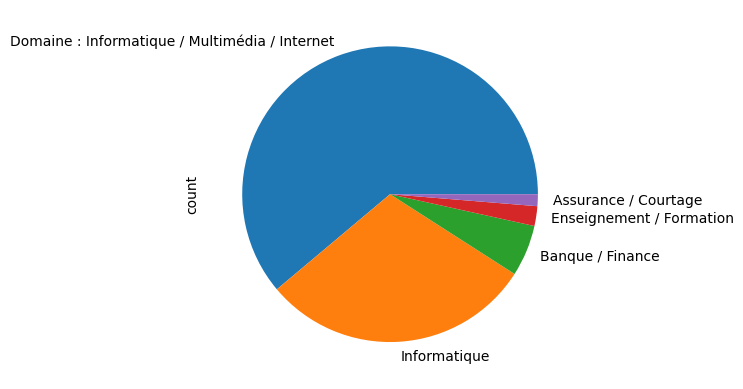

In [20]:
#visualisation de Domaine : top 5 Domaine 
Domaine_sort=Domaine_counts.sort_values(ascending=False)
Domaine_Top_5 = Domaine_sort[:5]
Domaine_Top_5.plot.pie()

<font color="red">on doit savoir est ce que ces domaine demandent des personne en IT 
 </font>

<h4> Fonction </h4> : pour décrire le rôle spécifique ou la responsabilité que quelqu'un occupe 

In [21]:
#nomber des  modalites de Fonction
data.Fonction.nunique()

12

In [22]:
# les modalite de Fonction 
data.Fonction.unique()

array(["Fonction : Informatique - Systèmes d'Information",
       'Fonction : Informatique - Développement',
       'Fonction : Informatique - Webdesign/Infographie',
       'Fonction : Informatique - Systèmes/Réseaux',
       'Fonction : Commercial professionnels (B2B)',
       'Fonction : Assistant/Ventes/Accueil',
       'Fonction : Commercial IT/Agence Com',
       'Fonction : Marketing/Communication',
       'Fonction : Commercial/Technico-Commercial',
       'Fonction : Informatique - Développement Hardware', nan,
       'Fonction : SAV/Hotline/Téléconseiller',
       'Informatique / Electronique'], dtype=object)

In [23]:
# value_counts pour chaque modalite 
Fonction_couts=data.Fonction.value_counts()
Fonction_couts

Fonction
Informatique / Electronique                         200
Fonction : Informatique - Systèmes/Réseaux           77
Fonction : Informatique - Développement              52
Fonction : Informatique - Systèmes d'Information     47
Fonction : Commercial IT/Agence Com                  32
Fonction : Assistant/Ventes/Accueil                  21
Fonction : Marketing/Communication                   21
Fonction : Commercial professionnels (B2B)           13
Fonction : Informatique - Webdesign/Infographie      11
Fonction : Commercial/Technico-Commercial             5
Fonction : Informatique - Développement Hardware      3
Fonction : SAV/Hotline/Téléconseiller                 1
Name: count, dtype: int64

<Axes: xlabel='Fonction'>

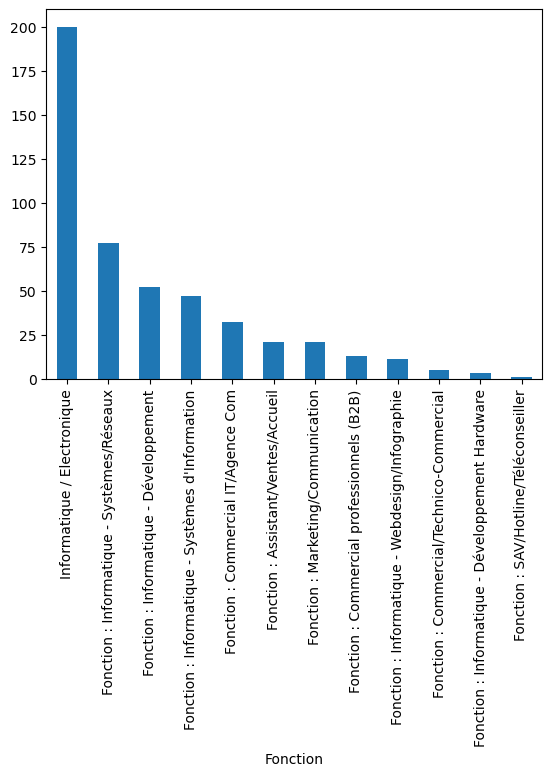

In [24]:
# visualisation de fonction : 
Fonction_couts.plot(kind="bar")

In [25]:
data.columns

Index(['job Title', 'adresse company', 'time', 'Domaine', 'Fonction',
       'Contrat', 'Entreprise', 'salaire', 'Niveau_etude'],
      dtype='object')

<h4> Adresse Company : pour determiner la ville  </h4>

In [26]:
# nomber de modalitee 
data["adresse company"].nunique()

45

In [27]:
# les modalites existe
data["adresse company"].unique()

array(['Casablanca', 'Marrakech', 'Agadir', 'Mohammedia', 'Rabat',
       'Tout le Maroc', 'Tanger', 'Zagora', 'Nouaceur', 'Bouskoura',
       'Tetouan', 'Berrechid', 'Fès', 'Safi', 'Benguerir', 'El jadida',
       'Autre ville', 'Meknès', 'Settat', 'Salé', 'Technopolis (Maroc)',
       'Rabat, Rabat-Salé-Kénitra, Maroc (Maroc)', 'Casablanca (Maroc)',
       'Rabat (Maroc)', 'Fès-Meknès, Maroc (Maroc)', 'Safi (Maroc)',
       'SALA AL JADIDA (Maroc)', 'Rabat Technopolis (Maroc)',
       'Benguerir (Maroc)', 'Mohammédia (Maroc)', 'Bouskoura (Maroc)',
       'Fès (Maroc)', 'Casanearshore (Maroc)', 'Agadir (Maroc)',
       'Salé - Technopolis (Maroc)', 'Salé (Technopolis) (Maroc)',
       'Sala Al Jadida (Maroc)', 'technopolis (Maroc)',
       'Technopolis, Salé (Maroc)', 'Nouaceur (Maroc)', 'Meknès (Maroc)',
       'Kénitra (Maroc)', 'Rabat et périphérie (Maroc)',
       'Sala al Jadida (Maroc)', 'Casablanca / Rabat (Maroc)'],
      dtype=object)

Pour compter exactement le nomber des modalite en doit faire une petite pretaritement : suprimer le mot (Maroc)

In [28]:
# Supprimer "(Maroc)" des valeurs dans la colonne 'adresse company'
data['adresse company'] = data['adresse company'].str.replace(r'\s*\(Maroc\)', '', regex=True)
Adress_counts=data["adresse company"].value_counts()

<Axes: ylabel='count'>

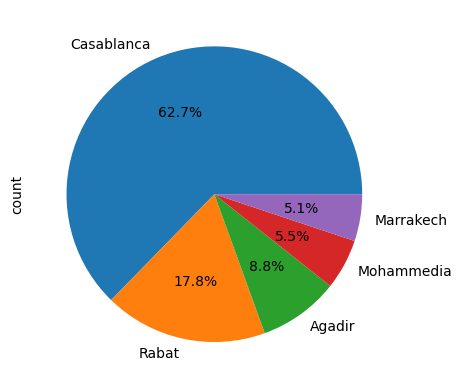

In [29]:
top_5_Adress = Adress_counts[:5]
top_5_Adress.plot.pie(autopct='%1.1f%%')

<h4> Contart</h4>

In [30]:
# le nomber des modalite 
data.Contrat.nunique()

10

In [31]:
data['Contrat'] = data['Contrat'].str.replace('Contrat : ', '').str.strip()
data.Contrat.unique()

array(['CDI', 'A discuter', 'Stage', nan, 'CDD', 'Interim', 'Freelance',
       'Autre'], dtype=object)

In [32]:
Contrat_counts = data.Contrat.value_counts()
Contrat_counts

Contrat
CDI           308
A discuter     89
Stage          56
Freelance      18
CDD             5
Autre           5
Interim         2
Name: count, dtype: int64

<Axes: xlabel='Contrat'>

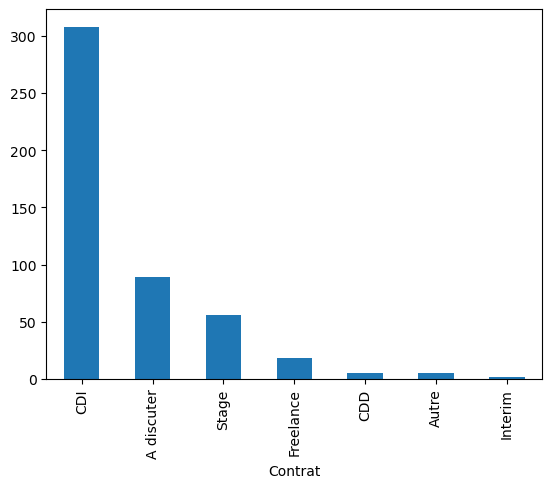

In [33]:
Contrat_counts.plot(kind="bar")

In [34]:
data.columns

Index(['job Title', 'adresse company', 'time', 'Domaine', 'Fonction',
       'Contrat', 'Entreprise', 'salaire', 'Niveau_etude'],
      dtype='object')

<h4>salaire <h4>

In [35]:
# nimber de modalite
data.salaire.nunique()

8

In [36]:
data.salaire.unique()

array(['Salaire : A discuter', 'Salaire : 8 000 - 10 000 DH',
       'Salaire : Commission', 'Salaire : Plus de 10 000 DH',
       'Salaire : 2 000 - 3 000 DH', 'Salaire : 6 000 - 8 000 DH',
       'Salaire : 3 000 - 4 000 DH', nan, 'Salaire : 4 000 - 6 000 DH'],
      dtype=object)

In [37]:
data.salaire = data.salaire.str.replace('Salaire : ','').str.strip()
Salire_counts=data.salaire.value_counts()

<Axes: ylabel='count'>

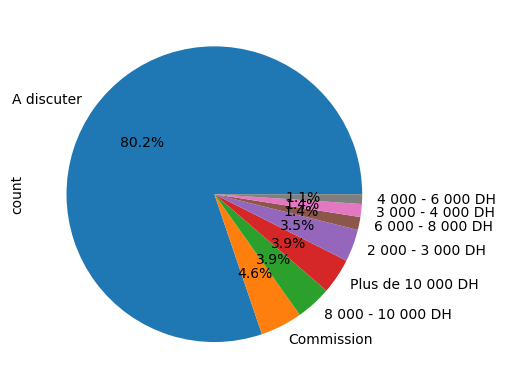

In [38]:
# visualisation
Salire_counts.plot.pie(autopct='%1.1f%%')

<font color="red">on doit savoir les profile avec les salaire plus eleve et eux qui ont un salaire moins eleve  </font>

<h4>Niveau_etude </h4>

In [39]:
data.Niveau_etude.nunique()

12

In [40]:
data.Niveau_etude = data.Niveau_etude.str.replace("Niveau d'études : ",'').str.strip()
remplacements = {
    'Bac plus 5': 'Bac +5',
    'Bac plus 4': 'Bac +4',
    'Bac plus 3': 'Bac +3',
    'Bac plus 2': 'Bac +2'
}

# Appliquer les remplacements à la colonne 'Niveau_etude'
data['Niveau_etude'] = data['Niveau_etude'].replace(remplacements, regex=True)

data.Niveau_etude.unique()

array(['Bac +2', 'Bac +5', 'Pas important', 'Bac +3', 'Niveau Bac',
       'Bac +4', nan, 'Bac +5 et plus', 'Autodidacte', 'Bac'],
      dtype=object)

In [41]:
data['Niveau_etude'] = data['Niveau_etude'].replace('Bac +5 et plus', 'Bac +5')
Niveau_counts=data.Niveau_etude.value_counts()
Niveau_counts

Niveau_etude
Bac +5           234
Pas important     99
Bac +2            93
Bac +3            34
Bac +4            18
Autodidacte        2
Bac                2
Niveau Bac         1
Name: count, dtype: int64

<Axes: xlabel='Niveau_etude'>

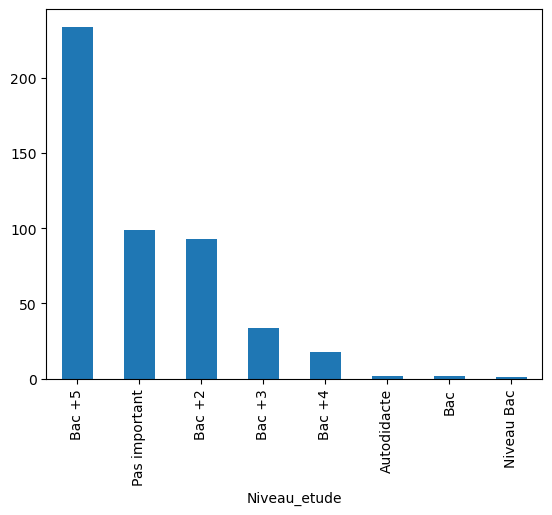

In [42]:
#visualisation des donnes
Niveau_counts.plot(kind="bar")

<h4>job Title</h4>

In [43]:
data['job Title'].nunique()

373

In [116]:
counts = data['job Title'].value_counts()

# Filtrer les lignes où le comptage est supérieur à 10
lignes_job_title_plus_de_10 = data[data['job Title'].isin(counts[counts >= 10].index)]
lignes_job_title_plus_de_10['job Title'].value_counts()

Series([], Name: count, dtype: int64)

<font color="red">on Doit supprimer les job title de type commercial </font>

In [45]:
data.columns

Index(['job Title', 'adresse company', 'time', 'Domaine', 'Fonction',
       'Contrat', 'Entreprise', 'salaire', 'Niveau_etude'],
      dtype='object')

# pretraitement

# traiment des valeur manqaute

In [55]:
data_na=data.isna().sum()
data_na

job Title            0
adresse company      0
time                 0
Domaine             89
Fonction            89
Contrat             89
Entreprise         288
salaire            288
Niveau_etude        89
dtype: int64

<h4>le pourcentage de valeur manquante </h4>

In [58]:
# le pourcentage des valeurs manaquant pour chaque column 
toux_na_col={}
for col in data.columns:
    toux_na_col[col] = data[col].isna().sum() / data.shape[0]

# Afficher les pourcentages de valeurs manquantes pour chaque colonne
for col, pourcentage in toux_na_col.items():
    print(f"Pourcentage de valeurs manquantes pour la colonne '{col}': {pourcentage:.2%}")

Pourcentage de valeurs manquantes pour la colonne 'job Title': 0.00%
Pourcentage de valeurs manquantes pour la colonne 'adresse company': 0.00%
Pourcentage de valeurs manquantes pour la colonne 'time': 0.00%
Pourcentage de valeurs manquantes pour la colonne 'Domaine': 23.36%
Pourcentage de valeurs manquantes pour la colonne 'Fonction': 23.36%
Pourcentage de valeurs manquantes pour la colonne 'Contrat': 23.36%
Pourcentage de valeurs manquantes pour la colonne 'Entreprise': 75.59%
Pourcentage de valeurs manquantes pour la colonne 'salaire': 75.59%
Pourcentage de valeurs manquantes pour la colonne 'Niveau_etude': 23.36%


<h3>traitement des donnes qui ont des valeurs manquente > 75%  (Entreprise / salaire )</h3>

<h4>on va supprimer la colone Entreprise (n'est pas important pour notre analyse) et pour le salaire on va laisser les valeur manaquante</h4>

In [64]:
#supprission de Entreprise
data = data.drop('Entreprise', axis=1)
data.head()

,job Title,adresse company,time,Domaine,Fonction,Contrat,salaire,Niveau_etude
0,Agent de Technique Informatique,Casablanca,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Systèmes d'Information,CDI,A discuter,Bac +2
1,Ingénieur développeur Symfony / PHP 7,Marrakech,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Développement,CDI,8 000 - 10 000 DH,Bac +5
2,INFOGRAPHIE DESING,Casablanca,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Webdesign/Infographie,A discuter,A discuter,Bac +2
3,Intégration erp odoo,Casablanca,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Systèmes d'Information,CDI,A discuter,Pas important
5,Technicien HELP DESK,Agadir,Aujourd'hui,Domaine : Informatique / Multimédia / Internet,Fonction : Informatique - Systèmes/Réseaux,CDI,A discuter,Bac +2


In [74]:
# remplacer les valeur manaquante dans notre dataser par "A discuter"
data['salaire'].fillna('A discuter', inplace=True)

<h3>traitement des variables qui ont le taus des valeur manquente = 23%  (Domaine / fonction / contrat / niveau_etude)</h3> <br>
- supprimssion de ses valeur manquante car les elemnent cle n'existe pas .

In [84]:
data.dropna(inplace=True)
data.isna().sum()

job Title          0
adresse company    0
time               0
Domaine            0
Fonction           0
Contrat            0
salaire            0
Niveau_etude       0
dtype: int64

- supprision de time column

In [87]:
data.drop('time',axis=1,inplace=True)

In [88]:
data.columns

Index(['job Title', 'adresse company', 'Domaine', 'Fonction', 'Contrat',
       'salaire', 'Niveau_etude'],
      dtype='object')

In [98]:
data = data[~data['job Title'].str.contains('Commerciale|Commercial|Sales ', case=False)]
data.shape

(292, 7)

In [102]:
data['Domaine'] = data['Domaine'].replace(['Informatique', 'Internet / Multimédia','Domaine : Informatique / Multimédia / Internet'], 'Informatique / Multimédia / Internet')

# Analyse Bivarie 

tout les donnes de notre dataset sont des donnes categoriell .
- alors on peut utiliser le test de khi-deux pour mesuer la dependance des variable entre eux .

## Resumer 
- le job titile a des relation significative avec : Domaine,Contrat , Niveau_etude.
- adresse company a des relation avec : Domaine , salaire , niveau_etude
- Domaine : salaire exclue
- Fonction : avec tout les features
- Niveau_etude : avec tout les features
- contrat : sauf adresse company , salaire

In [114]:
from scipy.stats import chi2_contingency
for col in data.columns:
    print(f"colone : " ,col)
    colonnes_sans_col = data.drop(col, axis=1) 
    for coll in colonnes_sans_col.columns:
        contingency_table = pd.crosstab(data[col], colonnes_sans_col[coll])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        if p_value < 0.05:
            print(f"il existe une association significative entre {col} et {coll}")
        else :
            print(f"il n'exite pas de relation entre {col} et {coll}")

    

colone :  job Title
il n'exite pas de relation entre job Title et adresse company
il existe une association significative entre job Title et Domaine
il existe une association significative entre job Title et Fonction
il existe une association significative entre job Title et Contrat
il n'exite pas de relation entre job Title et salaire
il existe une association significative entre job Title et Niveau_etude
colone :  adresse company


il n'exite pas de relation entre adresse company et job Title
il existe une association significative entre adresse company et Domaine
il existe une association significative entre adresse company et Fonction
il n'exite pas de relation entre adresse company et Contrat
il existe une association significative entre adresse company et salaire
il existe une association significative entre adresse company et Niveau_etude
colone :  Domaine
il existe une association significative entre Domaine et job Title
il existe une association significative entre Domaine et adresse company
il n'exite pas de relation entre Domaine et Fonction
il existe une association significative entre Domaine et Contrat
il n'exite pas de relation entre Domaine et salaire
il existe une association significative entre Domaine et Niveau_etude
colone :  Fonction
il existe une association significative entre Fonction et job Title
il existe une association significative entre Fonction et adresse company
il n'exite pas de rel

<h4>nomber de poste pour chaque demain</h4>

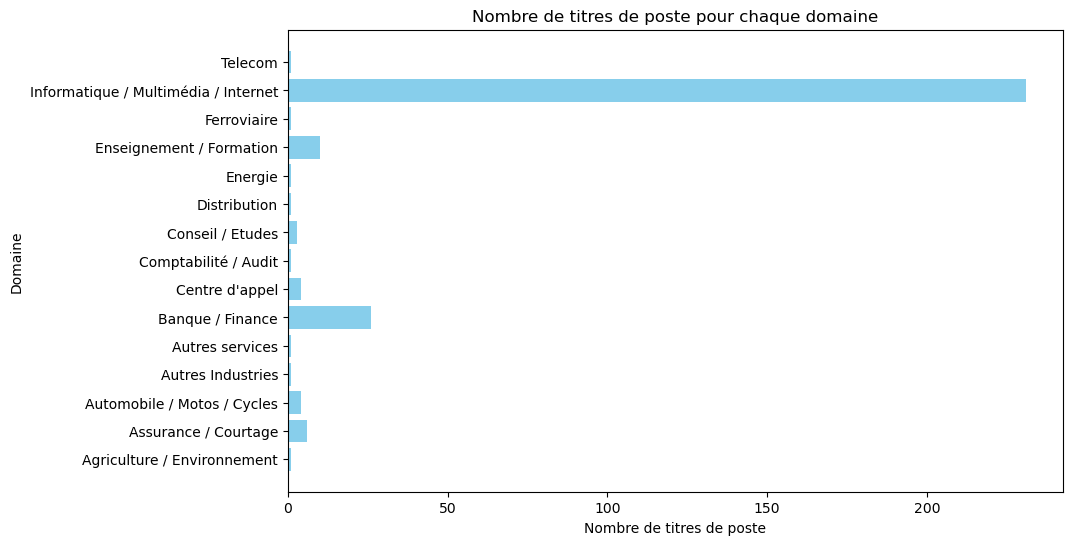

In [105]:
# Grouper les données par domaine et collecter les titres de poste dans une liste pour chaque domaine
groupes_domaine = data.groupby('Domaine')['job Title'].apply(list)

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 6))

# Afficher les titres de poste pour chaque domaine
for i, (domaine, titres_poste) in enumerate(groupes_domaine.items()):
    # Ajouter des barres horizontales pour chaque domaine avec le nombre de titres de poste
    ax.barh(domaine, len(titres_poste), color='skyblue')

# Définir les étiquettes et le titre
ax.set_xlabel('Nombre de titres de poste')
ax.set_ylabel('Domaine')
ax.set_title('Nombre de titres de poste pour chaque domaine')

# Afficher la figure
plt.show()

<h4>nomber de poste pour chaque type de contrat</h4>

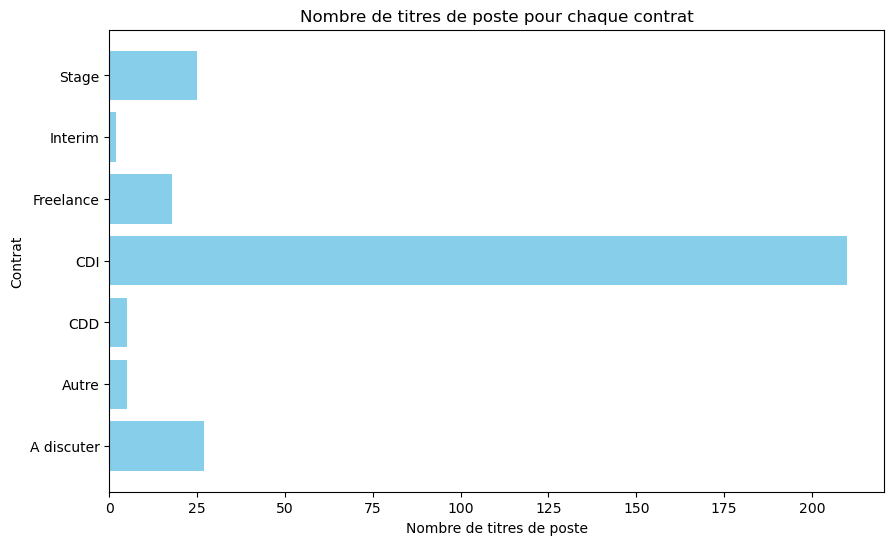

In [108]:
# Grouper les données par domaine et collecter les titres de poste dans une liste pour chaque domaine
groupes_Contrat = data.groupby('Contrat')['job Title'].apply(list)

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 6))

# Afficher les titres de poste pour chaque domaine
for i, (domaine, titres_poste) in enumerate(groupes_Contrat.items()):
    # Ajouter des barres horizontales pour chaque domaine avec le nombre de titres de poste
    ax.barh(domaine, len(titres_poste), color='skyblue')

# Définir les étiquettes et le titre
ax.set_xlabel('Nombre de titres de poste')
ax.set_ylabel('Contrat')
ax.set_title('Nombre de titres de poste pour chaque contrat')

# Afficher la figure
plt.show()

<h4>nomber de poste par rapport niveau d'etude</h4>

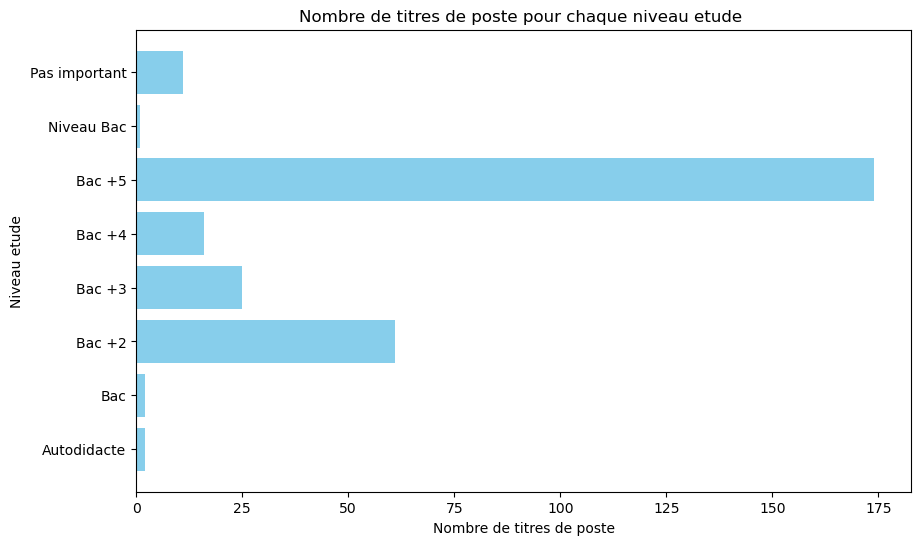

In [109]:
groupes_NiveauEtude = data.groupby('Niveau_etude')['job Title'].apply(list)

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 6))

# Afficher les titres de poste pour chaque domaine
for i, (domaine, titres_poste) in enumerate(groupes_NiveauEtude.items()):
    # Ajouter des barres horizontales pour chaque domaine avec le nombre de titres de poste
    ax.barh(domaine, len(titres_poste), color='skyblue')

# Définir les étiquettes et le titre
ax.set_xlabel('Nombre de titres de poste')
ax.set_ylabel('Niveau etude')
ax.set_title('Nombre de titres de poste pour chaque niveau etude ')

# Afficher la figure
plt.show()

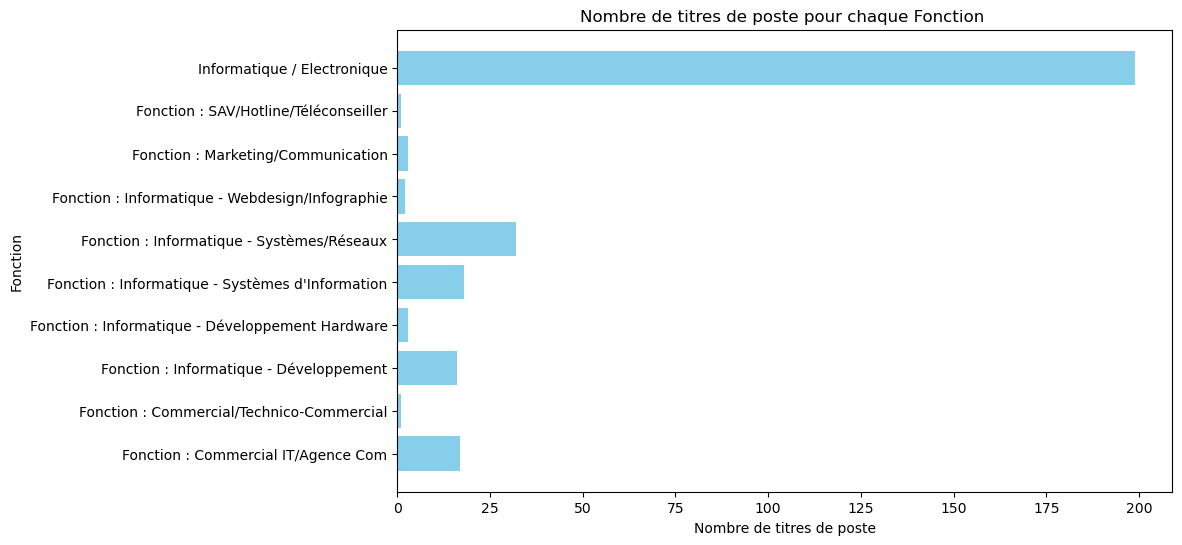

In [113]:
groupes_Domaine= data.groupby('Fonction')['job Title'].apply(list)

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 6))

# Afficher les titres de poste pour chaque domaine
for i, (domaine, titres_poste) in enumerate(groupes_Domaine.items()):
    # Ajouter des barres horizontales pour chaque domaine avec le nombre de titres de poste
    ax.barh(domaine, len(titres_poste), color='skyblue')

# Définir les étiquettes et le titre
ax.set_xlabel('Nombre de titres de poste')
ax.set_ylabel('Fonction')
ax.set_title('Nombre de titres de poste pour chaque Fonction ')

# Afficher la figure
plt.show()

In [121]:
data['Fonction'].isna().sum()

0

# Resumer : 
les poste dans le domaine IT depand de : 
- niveau etude  , Contrat , domaine , fonction


# sauvgarder le dernier version de donnes 

In [120]:
data.to_csv('donnees_traitees.csv', index=False)